In [1]:
import pandas as pd
df = pd.read_csv('inputs/diabetes_data_upload.csv')

In [2]:
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
            'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

for symptom in symptoms:
    df[symptom] = df[symptom].map({'No': 0, 'Yes': 1})

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['class'] = df['class'].map({'Negative': 0, 'Positive': 1})

In [3]:
df.sample(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
490,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
100,48,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1
110,53,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1


<AxesSubplot:>

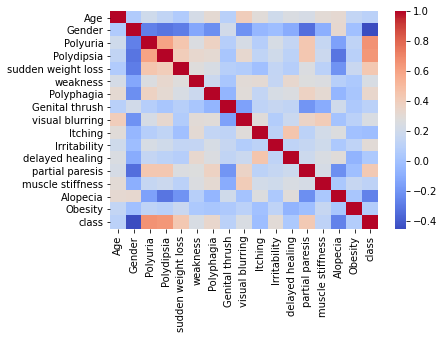

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), cmap = 'coolwarm')

# Classification

In [8]:
y = df['class']
x = df.drop('class', axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 4, criterion = 'entropy')
model.fit(xTrain, yTrain)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [14]:
predict_train = model.predict(xTrain)
predict_test = model.predict(xTest)

In [16]:
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
print(classification_report(yTrain, predict_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       144
           1       0.98      0.95      0.97       220

    accuracy                           0.96       364
   macro avg       0.95      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364

